In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241214_141136.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241214_141136.braidz using pyarrow


In [3]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              3    26974  1.734182e+09 -0.097063 -0.006475  0.073156   
 1              4    26977  1.734182e+09 -0.095603 -0.008099  0.066212   
 2              5    26980  1.734182e+09 -0.094081 -0.009267  0.060225   
 3              6    26983  1.734182e+09 -0.092231 -0.010368  0.054892   
 4              7    26986  1.734182e+09 -0.088973 -0.009286  0.050736   
 ...          ...      ...           ...       ...       ...       ...   
 10506371  158354  8653374  1.734268e+09 -0.060254 -0.007737  0.242681   
 10506372  158355  8653383  1.734268e+09 -0.037595 -0.062935  0.258860   
 10506373  158356  8653385  1.734268e+09 -0.037568 -0.062962  0.258822   
 10506374  158357  8653391  1.734268e+09 -0.037582 -0.062980  0.258834   
 10506375  158358  8654519  1.734268e+09 -0.045703 -0.006058  0.202299   
 
               xvel      yvel      zvel           P00           P01  \
 0        -2.872981 -0.973339  1.153858

In [4]:
data = extract_stimulus_centered_data(df,csvs["opto"])

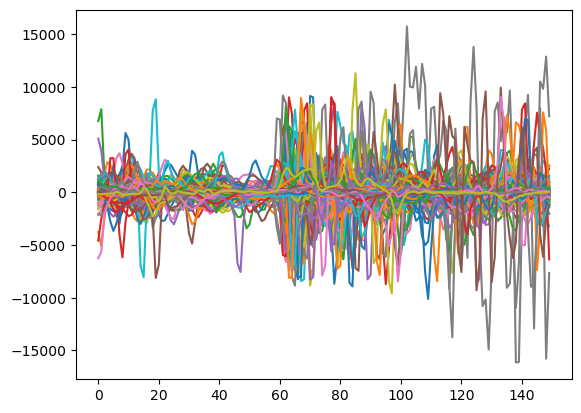

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

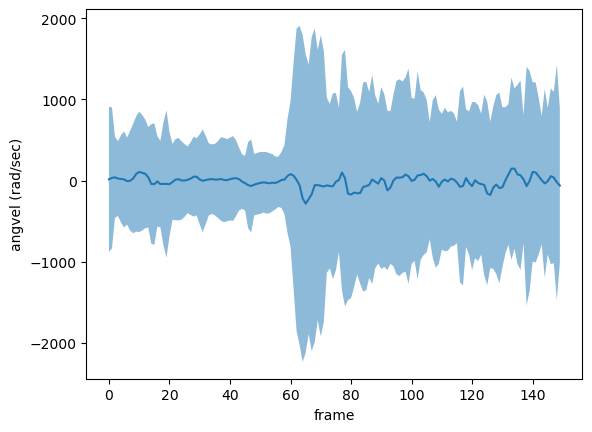

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

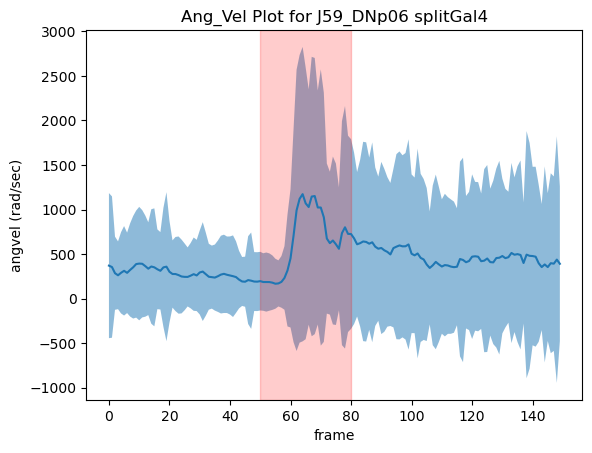

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J59_DNp06 splitGal4")
plt.show()

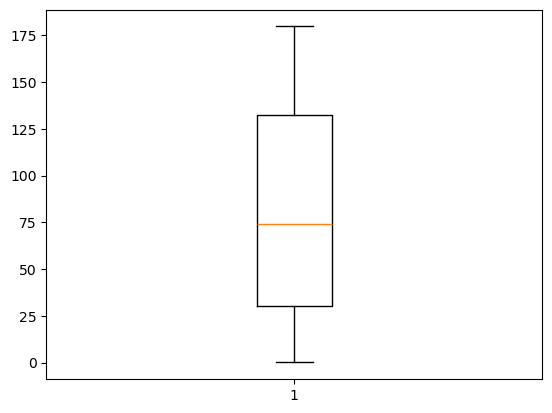

In [8]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [9]:
type(heading_diffs)

list

In [10]:
print(len(heading_diffs))

249


In [13]:
Heading_diffs = np.array(heading_diffs)
print("Shape:", Heading_diffs.shape)
print(Heading_diffs)

Shape: (249,)
[ 9.68192556e+01 -1.43908909e+02  2.28963600e+01 -1.06979127e+02
 -1.45673322e+02 -1.22720042e+02  2.92229067e+01  1.33190867e+02
 -5.67435902e+01 -1.72366867e+02 -4.77938397e+01 -1.72574381e+02
  2.68064342e+01  1.32414546e+02  1.27711962e+02  3.89551682e+01
 -8.01370163e+01  1.11450327e+01 -1.20143161e+02  3.34345712e+01
  1.59416076e+02  1.44178751e+02  2.18856970e+01  1.45089366e+02
  1.67646106e+02  1.55487463e+01  5.73454765e+01  9.53146238e+01
  7.40280031e+01 -3.43316328e+01 -1.52561548e+02  1.44067066e+02
  5.39627553e+01  1.33824274e+02 -1.77631464e+02  5.20104427e+01
 -1.48184390e+02  1.45755536e+02 -1.61783470e+02 -5.75722823e+01
 -1.36568115e+02 -8.45426370e+01  7.67415531e+01 -5.27341089e+01
 -1.05442263e+02 -6.47581058e+00  1.62660413e+01  6.54719693e+01
 -9.93179744e+01 -2.35026931e+01 -1.42627052e+02 -8.33475672e+01
 -4.06507574e+01 -1.48947693e+02  2.78696562e+01  1.79173546e+02
  1.64046199e+02  1.67080922e+01 -5.71062633e+01 -1.72331912e+01
 -4.2148507

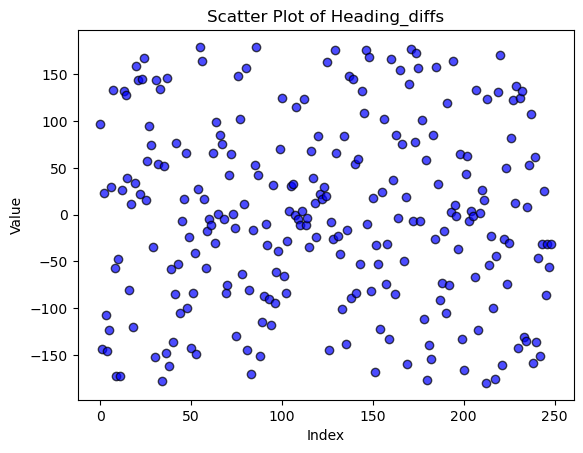

In [15]:
plt.scatter(range(len(Heading_diffs)), Heading_diffs, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatter Plot of Heading_diffs")

# Display the plot
plt.show()











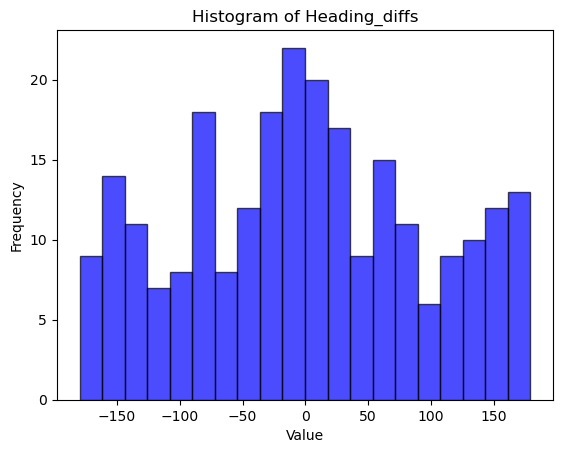

In [16]:
import matplotlib.pyplot as plt

# Assuming Heading_diffs is already defined as a 1D NumPy array
# Histogram
plt.hist(Heading_diffs, bins=20, color='blue', alpha=0.7, edgecolor='black')

# Labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Heading_diffs")

# Display the plot
plt.show()


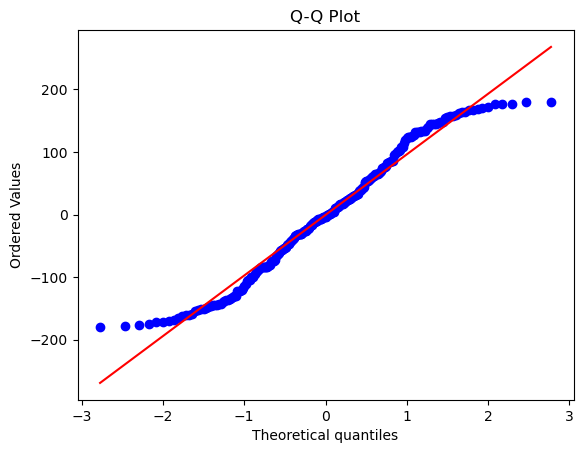

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot
stats.probplot(Heading_diffs, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


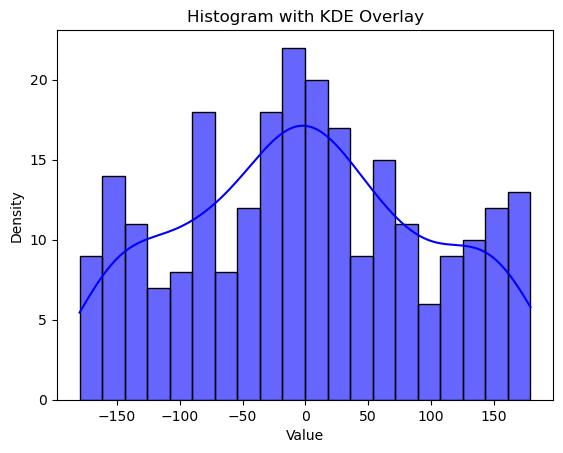

In [18]:
import seaborn as sns

sns.histplot(Heading_diffs, kde=True, bins=20, color='blue', alpha=0.6)
plt.title("Histogram with KDE Overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [19]:
from scipy.stats import shapiro

stat, p = shapiro(Heading_diffs)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p:.4f}")

if p > 0.05:
    print("The data is likely normal (fail to reject H0).")
else:
    print("The data is likely not normal (reject H0).")

Shapiro-Wilk Test Statistic: 0.9708, p-value: 0.0001
The data is likely not normal (reject H0).


In [20]:
from scipy.stats import kstest

stat, p = kstest(Heading_diffs, 'norm', args=(Heading_diffs.mean(), Heading_diffs.std()))
print(f"Kolmogorov-Smirnov Test Statistic: {stat:.4f}, p-value: {p:.4f}")

if p > 0.05:
    print("The data is likely normal (fail to reject H0).")
else:
    print("The data is likely not normal (reject H0).")

Kolmogorov-Smirnov Test Statistic: 0.0588, p-value: 0.3414
The data is likely normal (fail to reject H0).


In [21]:
from scipy.stats import anderson

result = anderson(Heading_diffs, dist='norm')
print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
for i, sig in enumerate(result.significance_level):
    print(f"Significance level {sig}%: Critical value = {result.critical_values[i]}")
    if result.statistic < result.critical_values[i]:
        print(f"At {sig}% significance, the data appears normal.")
    else:
        print(f"At {sig}% significance, the data does not appear normal.")

Anderson-Darling Test Statistic: 1.2854
Significance level 15.0%: Critical value = 0.567
At 15.0% significance, the data does not appear normal.
Significance level 10.0%: Critical value = 0.646
At 10.0% significance, the data does not appear normal.
Significance level 5.0%: Critical value = 0.775
At 5.0% significance, the data does not appear normal.
Significance level 2.5%: Critical value = 0.904
At 2.5% significance, the data does not appear normal.
Significance level 1.0%: Critical value = 1.075
At 1.0% significance, the data does not appear normal.


In [22]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
data_skewness = skew(Heading_diffs)
data_kurtosis = kurtosis(Heading_diffs)

print(f"Skewness: {data_skewness:.4f}")
print(f"Kurtosis: {data_kurtosis:.4f}")


Skewness: 0.0399
Kurtosis: -0.9068


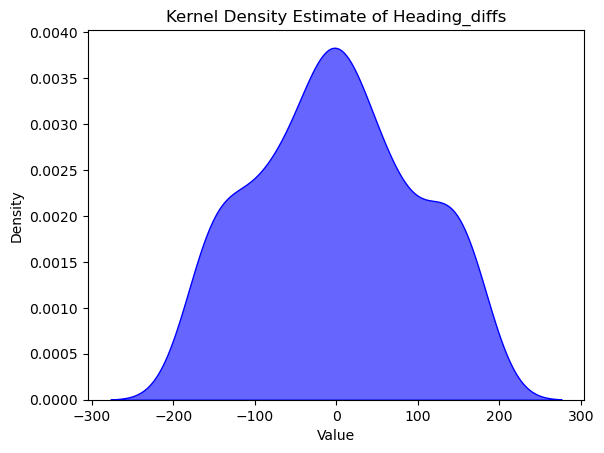

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot (using seaborn)
sns.kdeplot(Heading_diffs, color='blue', fill=True, alpha=0.6)

# Labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Heading_diffs")

# Display the plot
plt.show()


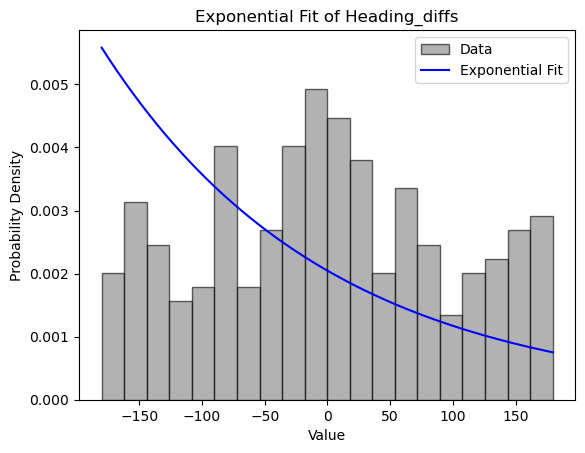

In [24]:
from scipy.stats import expon
import numpy as np

# Fit an exponential distribution
params = expon.fit(Heading_diffs)

# Create x values for plotting
x = np.linspace(min(Heading_diffs), max(Heading_diffs), 1000)
pdf = expon.pdf(x, *params)  # Generate the PDF

# Plot the data histogram and fitted curve
plt.hist(Heading_diffs, bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Data')
plt.plot(x, pdf, color='blue', label='Exponential Fit')

# Labels and legend
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Exponential Fit of Heading_diffs")
plt.legend()

# Display the plot
plt.show()
